<a href="https://colab.research.google.com/github/noahbereketab/Examining-Fairness-and-Impact-of-Black-Box-Machine-Learning-Algorithms-Senior-Thesis-/blob/main/Reproducing_COMPAS_Scores_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary classes

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


### Data visualizations from experiments

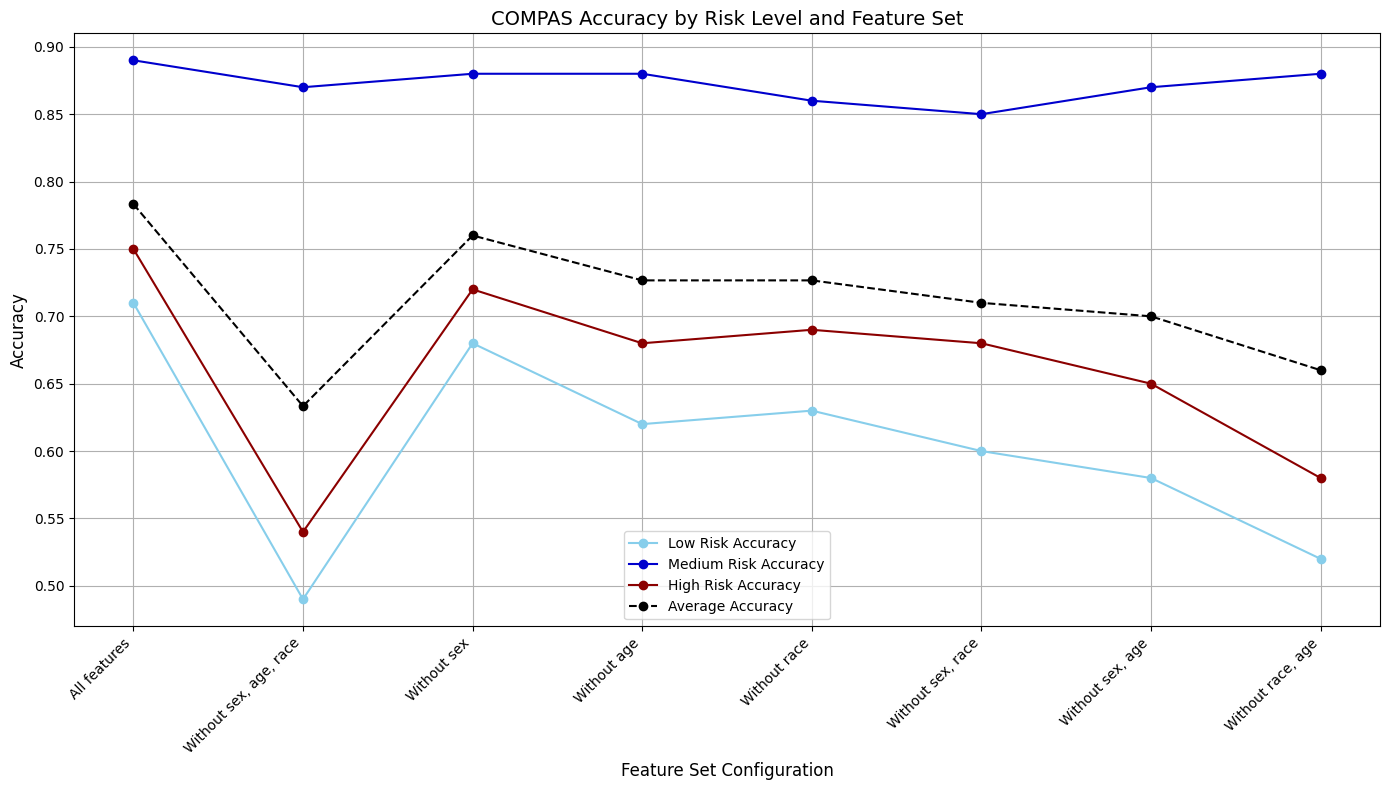

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
conditions = ['All features', 'Without sex, age, race', 'Without sex', 'Without age', 'Without race', 'Without sex, race', 'Without sex, age', 'Without race, age']
low_accuracy = [0.71, 0.49, 0.68, 0.62, 0.63, 0.60, 0.58, 0.52]
medium_accuracy = [0.89, 0.87, 0.88, 0.88, 0.86, 0.85, 0.87, 0.88]
high_accuracy = [0.75, 0.54, 0.72, 0.68, 0.69, 0.68, 0.65, 0.58]

average_accuracy = [(l + m + h) / 3 for l, m, h in zip(low_accuracy, medium_accuracy, high_accuracy)]

x_positions = np.arange(len(conditions))

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_positions, low_accuracy, label='Low Risk Accuracy', marker='o', linestyle='-', color='skyblue')
ax.plot(x_positions, medium_accuracy, label='Medium Risk Accuracy', marker='o', linestyle='-', color='mediumblue')
ax.plot(x_positions, high_accuracy, label='High Risk Accuracy', marker='o', linestyle='-', color='darkred')
ax.plot(x_positions, average_accuracy, label='Average Accuracy', marker='o', linestyle='--', color='black')  # Added line for average accuracy

ax.set_xlabel('Feature Set Configuration', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('COMPAS Accuracy by Risk Level and Feature Set', fontsize=14)
ax.set_xticks(x_positions)
ax.set_xticklabels(conditions, rotation=45, ha="right", fontsize=10)
ax.legend()

ax.grid(True)
plt.tight_layout()

plt.show()



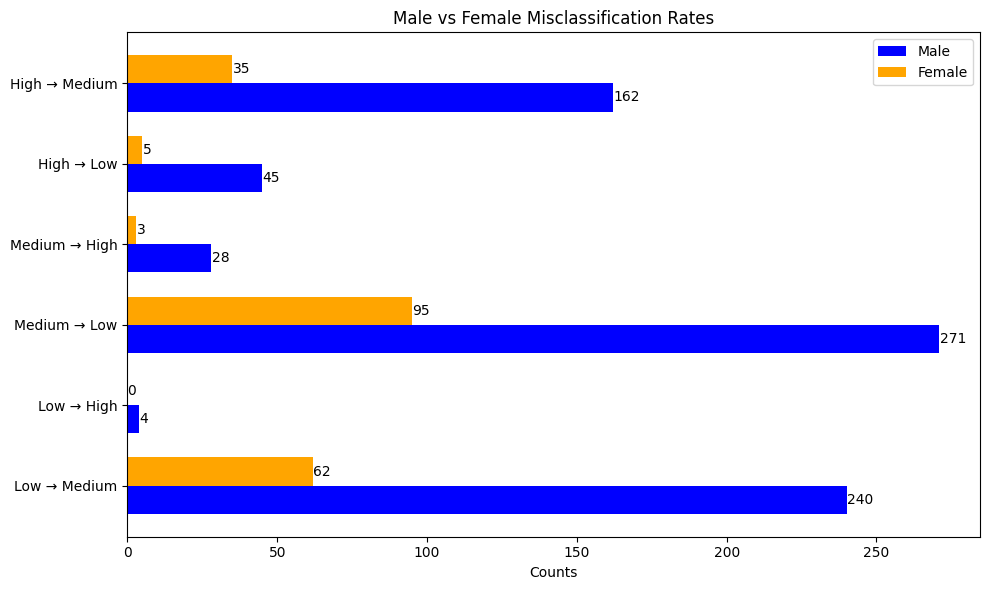

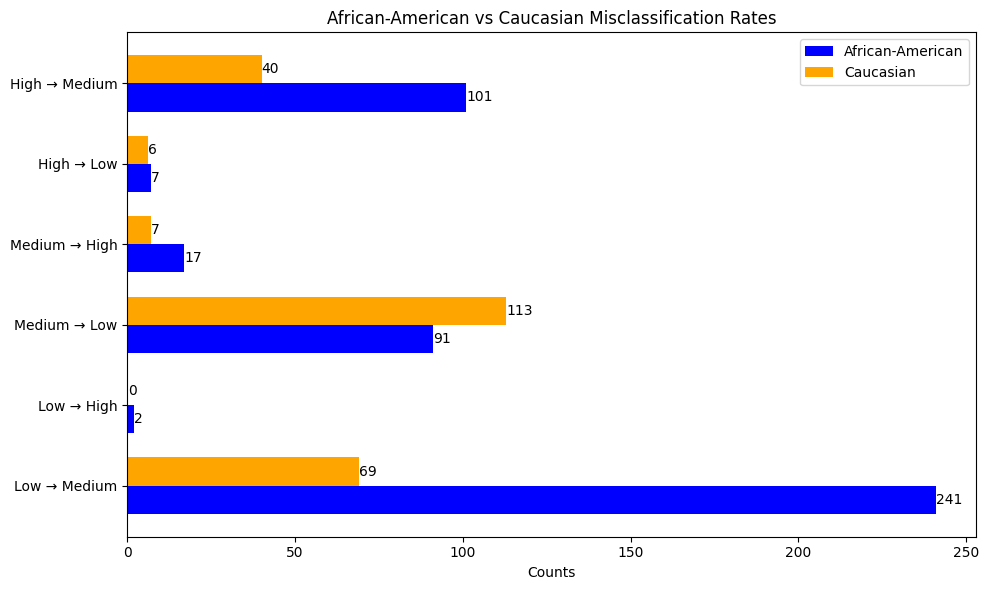

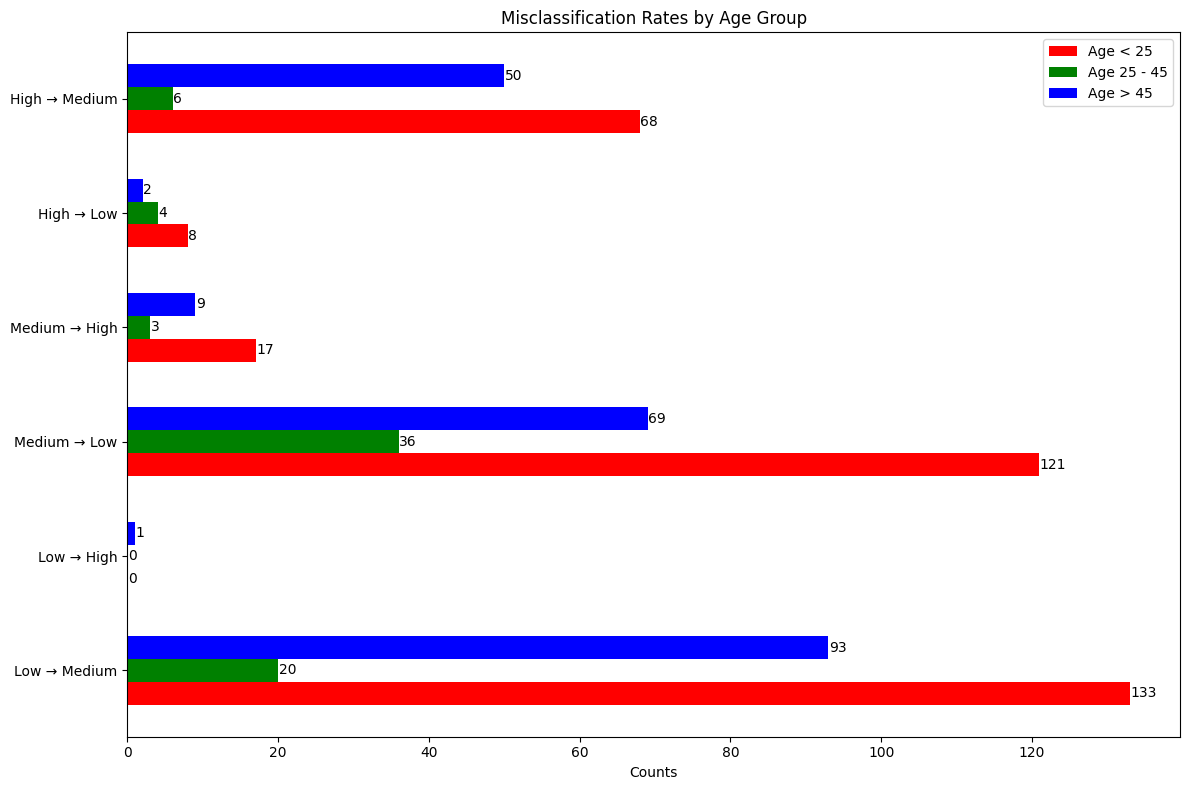

In [12]:

import matplotlib.pyplot as plt
import numpy as np

data = {
    'Male': [240, 4, 271, 28, 45, 162],
    'Female': [62, 0, 95, 3, 5, 35],
    'African-American': [241, 2, 91, 17, 7, 101],
    'Caucasian': [69, 0, 113, 7, 6, 40],
    'Age < 25': [133, 0, 121, 17, 8, 68],
    'Age 25 - 45': [20, 0, 36, 3, 4, 6],
    'Age > 45': [93, 1, 69, 9, 2, 50],
    'African-American, Male': [163, 1, 63, 8, 4, 73],
    'Caucasian, Male': [24, 0, 68, 1, 3, 16],
    'African-American, Female': [38, 1, 13, 2, 0, 15],
    'Caucasian, Female': [11, 0, 27, 0, 3, 9]
}

# Misclassification types
misclassification_types = ['Low → Medium', 'Low → High', 'Medium → Low', 'Medium → High', 'High → Low', 'High → Medium']

def plot_group_comparisons(group1, group2, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(misclassification_types))
    bar_width = 0.35

    bars1 = ax.barh(index - bar_width/2, data[group1], bar_width, label=group1, color='blue')
    bars2 = ax.barh(index + bar_width/2, data[group2], bar_width, label=group2, color='orange')

    for bars in [bars1, bars2]:
        for bar in bars:
            width = bar.get_width()
            label_x_pos = bar.get_width() + bar.get_x() + 0.05
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    ax.set_xlabel('Counts')
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(misclassification_types)
    ax.legend()

    plt.tight_layout()
    plt.show()

def plot_age_groups():
    fig, ax = plt.subplots(figsize=(12, 8))
    groups = ['Age < 25', 'Age 25 - 45', 'Age > 45']
    colors = ['red', 'green', 'blue']

    for i, group in enumerate(groups):
        bars = ax.barh(np.arange(len(misclassification_types)) + i*0.2, data[group], 0.2, label=group, color=colors[i])
        for bar in bars:
            width = bar.get_width()
            label_x_pos = bar.get_width() + bar.get_x() + 0.05
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    ax.set_xlabel('Counts')
    ax.set_title('Misclassification Rates by Age Group')
    ax.set_yticks(np.arange(len(misclassification_types)) + 0.2)
    ax.set_yticklabels(misclassification_types)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_group_comparisons('Male', 'Female', 'Male vs Female Misclassification Rates')
plot_group_comparisons('African-American', 'Caucasian', 'African-American vs Caucasian Misclassification Rates')
plot_age_groups()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Male': [240, 4, 271, 28, 45, 162],
    'Female': [62, 0, 95, 3, 5, 35],
    'African-American': [241, 2, 91, 17, 7, 101],
    'Caucasian': [69, 0, 113, 7, 6, 40],
    'Age < 25': [133, 0, 121, 17, 8, 68],
    'Age 25 - 45': [20, 0, 36, 3, 4, 6],
    'Age > 45': [93, 1, 69, 9, 2, 50],
    'African-American, Male': [163, 1, 63, 8, 4, 73],
    'Caucasian, Male': [24, 0, 68, 1, 3, 16],
    'African-American, Female': [38, 1, 13, 2, 0, 15],
    'Caucasian, Female': [11, 0, 27, 0, 3, 9]
}

# Selecting specific misclassification types
misclassification_types = ['Low → High', 'High → Low']
indices = [1, 4]  # These indices correspond to the 'Low → High' and 'High → Low' in the original list

# Create a single plot for the selected misclassification types
def plot_specific_groups(data, title='Misclassification Rates for Critical Transitions'):
    fig, ax = plt.subplots(figsize=(12, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

    # Plotting only specific misclassifications
    for i, (group, counts) in enumerate(data.items()):
        specific_counts = [counts[idx] for idx in indices]  # Select specific counts
        bars = ax.barh(np.arange(len(specific_counts)) + i * 0.1, specific_counts, 0.1, label=group, color=colors[i])
        for bar in bars:
            width = bar.get_width()
            label_x_pos = width + 0.5  # Adjust offset for label placement
            ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

    ax.set_xlabel('Counts')
    ax.set_title(title)
    ax.set_yticks(np.arange(len(misclassification_types)))
    ax.set_yticklabels(misclassification_types)
    ax.legend(title="Demographic Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_specific_groups(data, 'Comparative Misclassification Rates for High and Low Transitions')


### Loading and Encoding COMPAS Data

In [15]:
data = pd.read_csv("compas-scores.csv")

label_encoder = LabelEncoder()
encoding_dict_race = {
    'African-American': 0,
    'Caucasian': 1,
    'Hispanic': 2,
    'Asian': 3,
    'Other': 4,
}
data['race_encoded'] = data['race'].map(encoding_dict_race)
data.dropna(subset=['race_encoded'], inplace=True)

encoding_dict_sex = {
    'Male': 0,
    'Female': 1,
}
data['sex_encoded'] = data['sex'].map(encoding_dict_sex)
data.dropna(subset=['sex_encoded'], inplace=True)

encoding_dict_age = {
    'Less than 25': 0,
    '25 - 45': 1,
    'Greater than 45': 2,
}
data['age_encoded'] = label_encoder.fit_transform(data['age_cat'])
data.dropna(subset=['age_encoded'], inplace=True)

data['c_charge_degree_encoded'] = label_encoder.fit_transform(data['c_charge_degree'])
data['c_charge_desc_encoded'] = label_encoder.fit_transform(data['c_charge_desc'])

data = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30)]
data = data[data['decile_score'] != -1]

encoding_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
data['score_text_encoded'] = data['score_text'].map(encoding_dict)
data.dropna(subset=['score_text_encoded'], inplace=True)


data['v_score_text_encoded'] = data['v_score_text'].map(encoding_dict)
data.dropna(subset=['v_score_text_encoded'], inplace=True)



### Support Methods

In [8]:
def prepare_data(data):
    X = data[['sex_encoded', 'age_encoded', 'race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex(data):
    X = data[['age_encoded', 'race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_age(data):
    X = data[['sex_encoded','race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_race(data):
    X = data[['sex_encoded', 'age_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_all(data):
    X = data[['priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex_race(data):
    X = data[['age_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex_age(data):
    X = data[['race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_race_age(data):
    X = data[['sex_encoded',  'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y


def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(X_train, y_train):
    model = DecisionTreeRegressor(random_state=42)
    #model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

def make_predictions(model, X):
    predictions = model.predict(X)
    return [round(pred) for pred in predictions]

def encode_and_clean(data, y_train, predictions):

    y_train_encoded = y_train.apply(lambda x: 'Low' if 1 <= x <= 4 else
                                                 'Medium' if 5 <= x <= 7 else
                                                 'High' if 8 <= x <= 10 else None)
    data['y_train_encoded'] = y_train_encoded.astype(str)
    data.dropna(subset=['y_train_encoded'], inplace=True)

    pred_series = pd.Series(predictions)
    pred_encoded = pred_series.apply(lambda x: 'Low' if 1 <= x <= 4 else
                                              'Medium' if 5 <= x <= 7 else
                                              'High' if 8 <= x <= 10 else None)
    data['pred_encoded'] = pred_encoded.astype(str)
    data.dropna(subset=['pred_encoded'], inplace=True)

    return y_train_encoded, pred_encoded

def plot_confusion_matrix(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return conf_mat

def calculate_accuracy(conf_mat):
    accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)
    accuracy_df = pd.DataFrame({
        'Class': ['Low', 'Medium', 'High'],
        'Accuracy': accuracies
    })
    print(accuracy_df)

def calculate_accuracy_detailed(conf_mat):
    accuracies = {}
    for i, category in enumerate(['Low', 'Medium', 'High']):
        correct_predictions = conf_mat[i, i]
        total_predictions = conf_mat[i].sum()
        accuracy = correct_predictions / total_predictions if total_predictions > 0 else float('nan')
        accuracies[category] = (accuracy, correct_predictions, total_predictions)

    return accuracies

def print_misclassification_details(conf_mat):
    # Calculating misclassified instances for each category
    misclassified_low = conf_mat[0, 1] + conf_mat[0, 2]  # Total 'Low' misclassified
    misclassified_medium = conf_mat[1, 0] + conf_mat[1, 2]  # Total 'Medium' misclassified
    misclassified_high = conf_mat[2, 0] + conf_mat[2, 1]  # Total 'High' misclassified

    # Calculating and printing specific misclassifications for incorrect classifications
    print(f"Incorrect 'Low' misclassified as 'Medium': {conf_mat[0, 1] / misclassified_low:.2f} (Incorrect: {conf_mat[0, 1]}, Total: {misclassified_low})" if misclassified_low else "No incorrect 'Low' misclassifications")
    print(f"Incorrect 'Low' misclassified as 'High': {conf_mat[0, 2] / misclassified_low:.2f} (Incorrect: {conf_mat[0, 2]}, Total: {misclassified_low})" if misclassified_low else "No incorrect 'Low' misclassifications")

    print(f"Incorrect 'Medium' misclassified as 'Low': {conf_mat[1, 0] / misclassified_medium:.2f} (Incorrect: {conf_mat[1, 0]}, Total: {misclassified_medium})" if misclassified_medium else "No incorrect 'Medium' misclassifications")
    print(f"Incorrect 'Medium' misclassified as 'High': {conf_mat[1, 2] / misclassified_medium:.2f} (Incorrect: {conf_mat[1, 2]}, Total: {misclassified_medium})" if misclassified_medium else "No incorrect 'Medium' misclassifications")

    print(f"Incorrect 'High' misclassified as 'Low': {conf_mat[2, 0] / misclassified_high:.2f} (Incorrect: {conf_mat[2, 0]}, Total: {misclassified_high})" if misclassified_high else "No incorrect 'High' misclassifications")
    print(f"Incorrect 'High' misclassified as 'Medium': {conf_mat[2, 1] / misclassified_high:.2f} (Incorrect: {conf_mat[2, 1]}, Total: {misclassified_high})" if misclassified_high else "No incorrect 'High' misclassifications")

def compare_predictions(label, correct_predictions, new_predictions):
    comparison_df = pd.DataFrame({
        f'Correctly Classified as {label}': correct_predictions,
        'New Prediction': new_predictions
    })

    incorrectly_classified = comparison_df[
        (comparison_df[f'Correctly Classified as {label}'] == label) &
        (comparison_df['New Prediction'] != label)
    ]

    counts = incorrectly_classified['New Prediction'].value_counts()
    for other_label in ['Low', 'Medium', 'High']:
        if other_label != label:
            count = counts.get(other_label, 0)
            print(f"Correctly classified as '{label}', now '{other_label}': {count}")

    return comparison_df

### Implementing Decision Tree and Visualization

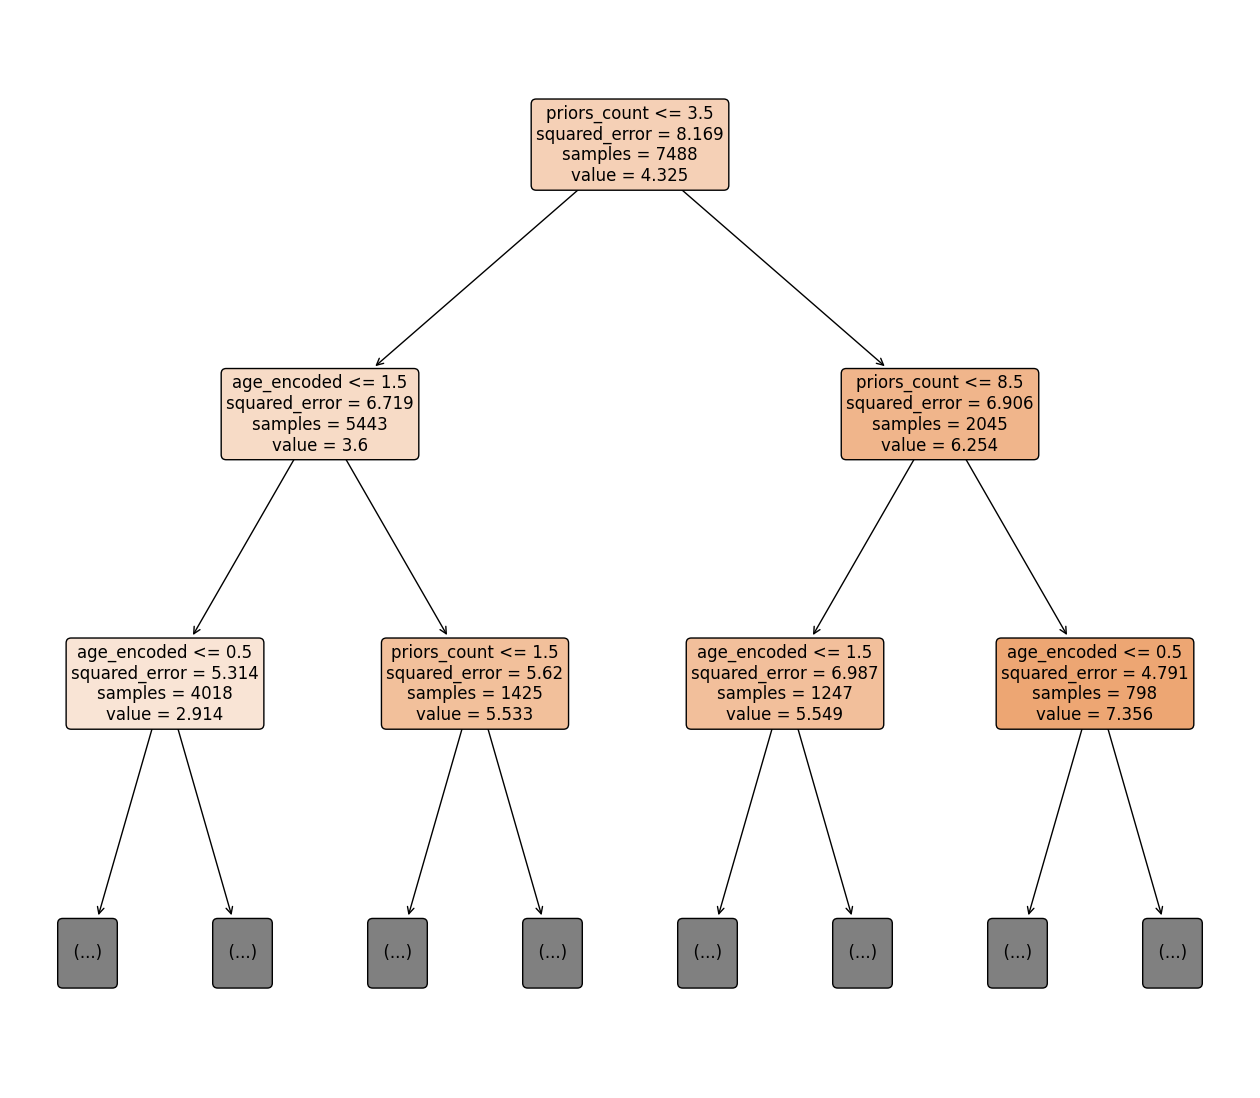

Depth of the tree: 30
Number of leaves: 3423


In [16]:
X, y = prepare_data(data)
X_train, X_test, y_train, y_test =split_data(X, y)

decision_tree_model = train_model(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_train)
decision_tree_pred_rounded = [round(pred) for pred in decision_tree_pred]
y_train_encoded, pred_encoded = encode_and_clean(data, y_train, decision_tree_pred_rounded)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Visualize the decision tree
plt.figure(figsize=(16,14))  #
plot_tree(decision_tree_model,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=2)  # Displaying up to 2 levels deep
plt.show()

import matplotlib.pyplot as plt
import numpy as np

print("Depth of the tree:", decision_tree_model.get_depth())
print("Number of leaves:", decision_tree_model.get_n_leaves())


### How does the accuracy of predicting low-risk, medium-risk, and high-risk COMPAS scores vary when excluding certain demographic features (sex, age, race) in a model predicting COMPAS scores? (Compute accuracy based off COMPAS score predictions using Decision Tree Regressor)



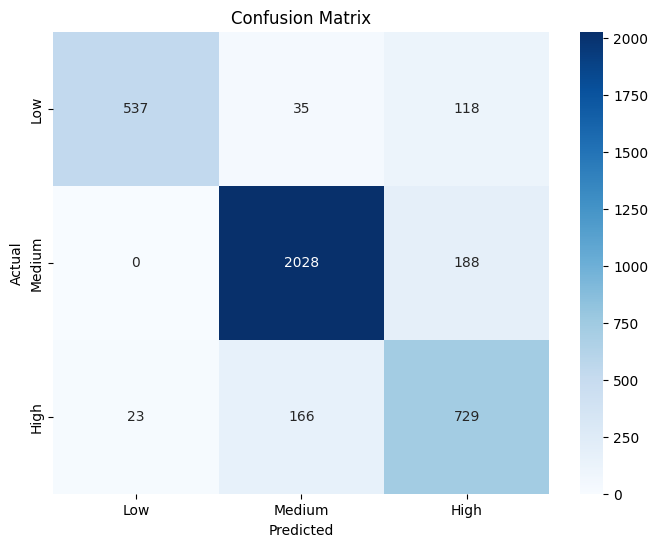

    Class  Accuracy
0     Low  0.778261
1  Medium  0.915162
2    High  0.794118
Low: 0.78 (Correct: 537, Total: 690)
Medium: 0.92 (Correct: 2028, Total: 2216)
High: 0.79 (Correct: 729, Total: 918)



In [17]:
#1. Run blocks "Loading and Encoding COMPAS Data" and "Support Methods"
"""
2. Select how you want to prepare data with which demographic features to include by setting X, y =
(prepare_data(data), prepare_data_without_sex(data), prepare_data_without_age(data),
prepare_data_without_race(data), prepare_data_without_all(data), prepare_data_without_sex_race(data),
prepare_data_without_sex_age(data), prepare_data_without_race_age)
"""

X, y = prepare_data(data)
X_train, X_test, y_train, y_test =split_data(X, y)

decision_tree_model = train_model(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_train)
decision_tree_pred_rounded = [round(pred) for pred in decision_tree_pred]
y_train_encoded, pred_encoded = encode_and_clean(data, y_train, decision_tree_pred_rounded)


conf_mat = confusion_matrix(y_train_encoded, pred_encoded)
plot_confusion_matrix(y_train_encoded, pred_encoded)
calculate_accuracy(conf_mat)

for category, (accuracy, correct, total) in calculate_accuracy_detailed(conf_mat).items():
    if pd.isna(accuracy):
        print(f"{category}: No data available")
    else:
        print(f"{category}: {accuracy:.2f} (Correct: {correct}, Total: {total})")
print();


### How does the misclassification rates for low, medium, and high-risk predictions vary when excluding certain demographic features (sex, age, race) in a model predicting COMPAS scores?


In [18]:
#1. Run blocks "Loading and Encoding COMPAS Data" and "Support Methods"

#2. Decide what sex you are excluding (0: Male, 1: Female). If none, just comment out.
#data = data.loc[data['sex_encoded'] != 0]

#3. Decide what races you are excluding (African-American: 0 , Caucasian: 1, Hispanic: 2, Asian: 3, Other: 4). If none, just comment out.
#data = data.loc[(data['race_encoded'] != 3) & (data['race_encoded'] != 4) & (data['race_encoded'] != 1) & (data['race_encoded'] != 2)]

#4. Decide what age groups you are excluding (Less than 25: 0, 25 - 45: 1, Greater than 45: 2). If none, just comment out.
#data = data.loc[(data['age_encoded'] != 0) & (data['age_encoded'] != 1) ]

X, y = prepare_data(data)
X_train, X_test, y_train, y_test =split_data(X, y)

decision_tree_model = train_model(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_train)
decision_tree_pred_rounded = [round(pred) for pred in decision_tree_pred]

y_train_encoded, pred_encoded = encode_and_clean(data, y_train, decision_tree_pred_rounded)

conf_mat = confusion_matrix(y_train_encoded, pred_encoded)
print_misclassification_details(conf_mat)
print();



Incorrect 'Low' misclassified as 'Medium': 0.17 (Incorrect: 7, Total: 41)
Incorrect 'Low' misclassified as 'High': 0.83 (Incorrect: 34, Total: 41)
Incorrect 'Medium' misclassified as 'Low': 0.00 (Incorrect: 0, Total: 51)
Incorrect 'Medium' misclassified as 'High': 1.00 (Incorrect: 51, Total: 51)
Incorrect 'High' misclassified as 'Low': 0.12 (Incorrect: 6, Total: 51)
Incorrect 'High' misclassified as 'Medium': 0.88 (Incorrect: 45, Total: 51)

